# Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("placementiq.csv")
df.head(3)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0


In [4]:
x= df.iloc[:,1:-1]
y = df["placement"]

<Axes: xlabel='cgpa', ylabel='Density'>

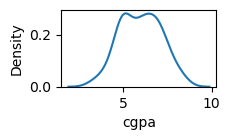

In [6]:
plt.figure(figsize=(2,1))
sns.kdeplot(data=df["cgpa"])

In [7]:
# normalization/scaling:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x)
x = pd.DataFrame(ss.transform(x),columns = x.columns)
x.head(3)

,cgpa,iq
0,0.710958,-0.014593
1,-0.079972,-0.442331
2,-0.607258,-0.064915


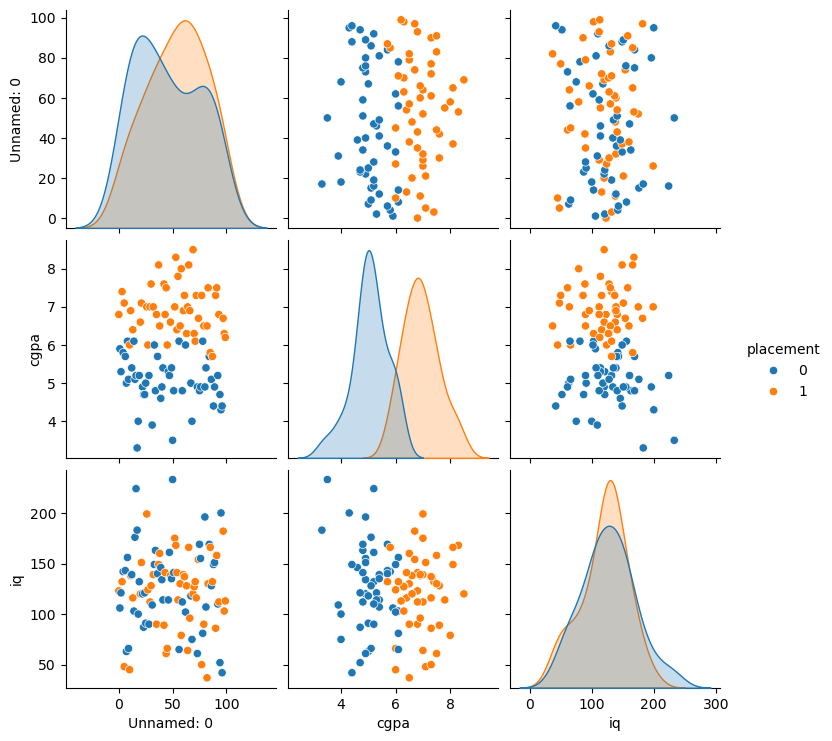

In [28]:
sns.pairplot(data=df,hue="placement")

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test , y_train, y_test = train_test_split(x,y , train_size=0.2 ,random_state=42 )

In [11]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [12]:
dr = DecisionTreeRegressor()
dr.fit(x_train,y_train)


DecisionTreeRegressor()

In [18]:
dr.score(x_test,y_test)*100

59.89974937343357

In [14]:
dc = DecisionTreeClassifier()
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
dc.score(x_test,y_test)*100

90.0

In [29]:
from sklearn.tree import plot_tree

[Text(0.6, 0.875, 'x[0] <= 0.184\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.4, 0.625, 'x[1] <= 0.162\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.5, 0.75, 'True  '),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6, 0.375, 'x[1] <= 0.325\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.7, 0.75, '  False')]

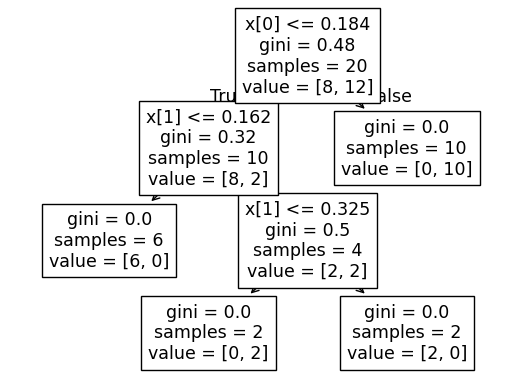

In [33]:
plot_tree(dc)

In [37]:
# to remove overfitting we check score of trained data and compare it with score of test data

for i in range(1,20):
    dc1 = DecisionTreeClassifier(max_depth= i)
    dc1.fit(x_train,y_train)
    print(dc1.score(x_train,y_train)  ,  dc1.score(x_test,y_test) ,   i )

0.9 0.9375 1
0.9 0.9375 2
1.0 0.9 3
1.0 0.9 4
1.0 0.9 5
1.0 0.9 6
1.0 0.9 7
1.0 0.9 8
1.0 0.9 9
1.0 0.9 10
1.0 0.9 11
1.0 0.9 12
1.0 0.9 13
1.0 0.9 14
1.0 0.9 15
1.0 0.9 16
1.0 0.9 17
1.0 0.9 18
1.0 0.9 19


In [38]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Perfexet\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

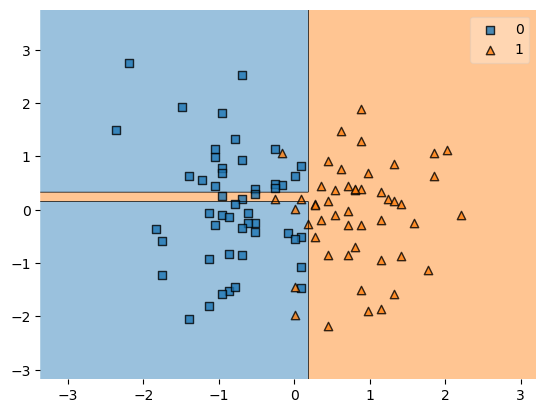

In [43]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),dc)